## Транслирование (Broadcasting)

Транслирование - это набор правил, применения бинарных функций над скалярами к массивам и векторам

In [1]:
import numpy as np
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Размеры не обязательно совпадают:

In [2]:
a + 5

array([5, 6, 7])

Транслирование дублирует значение ``5`` в массив ``[5, 5, 5]``, и затем складывает два массива.
Реального физического дублирования не происходит - это просто удобная умозрительная модель, того что происходит.
Можно сложить одномерный и двумерный массивы:

In [3]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [4]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Одномерный массив ``a`` растягивается по второму измерению, чтобы соответствовать форме ``M``.

Но мы можем транслировать и два массива:

In [5]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [6]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

![broadcasting](broadcasting.png)

## Правила транслирования
**Последовательно** применяются правила:

- Правило 1: Если масивы отличаются в числе измерений, форма массива с меньшим числом измерений *дополняется* **слева** необходимым числом измерений единичного размера.
- Правило 2: Если формы двух массивов отличаются в каком либо измерении и при этом один из этих массивов имеет в этом измерении единичную размерность, то массив с единичной размерностью растягивается вдоль нее чтобы соответвовать размерности другого массива.
- Правило 3: Если формы двух массивов отличаются в каком либо измерении и ни один из этих массивов не имеет в этом измерении единичную размерность, то возбуждается исключение.

### Пример 1

Двумерный массив и одномерный массив:

In [7]:
M = np.ones((2, 3))
a = np.arange(3) 
M

array([[1., 1., 1.],
       [1., 1., 1.]])

In [8]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Пример 2

Оба массива должны растягиваться:

In [9]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [10]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Пример 3

In [11]:
M = np.ones((3, 2))
a = np.arange(3) 
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [12]:
a[:, np.newaxis].shape

(3, 1)

In [13]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

## Транслирование на практике

### Центрирование случайной величины

In [14]:
X = np.random.random((10, 3))

Найдем оценку мат.ожидания по строкам:

In [15]:
Xmean = X.mean(0)
Xmean

array([0.41301587, 0.3345526 , 0.50586906])

Теперь можно центрировать через трансляцию:

In [16]:
X_centered = X - Xmean

Проверим мат.ожидание центрированных величин:

In [17]:
X_centered.mean(0)

array([-4.44089210e-17,  1.66533454e-17,  2.22044605e-17])

### График двумерной функции

Пусть дана функция $z = f(x, y)$ :

In [18]:
# для x и y дано 50 шагов от 0 до 5
x = np.linspace(0, 5, 50)                 
y = np.linspace(0, 5, 50)[:, np.newaxis]  
z =  np.cos(13 + y * x) * np.cos(x) + np.sin(x) ** 8 

Нарисуем нашу функцию:

In [19]:
import matplotlib.pyplot as plt

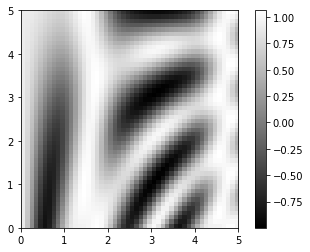

In [20]:
plt.imshow(z, extent=[0, 5, 0, 5],  cmap='gray')
plt.colorbar();

In [21]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)
xx, yy = np.meshgrid(x, y)
xx, yy

(array([[0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        ...,
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.10204082, 0.10204082, 0.10204082, ..., 0.10204082, 0.10204082,
         0.10204082],
        [0.20408163, 0.20408163, 0.20408163, ..., 0.20408163, 0.20408163,
         0.20408163],
        ...,
        [4.79591837, 4.79591837, 4.79591837, ..., 4.79591837, 4.79591837,
         4.79591837],
        [4.8

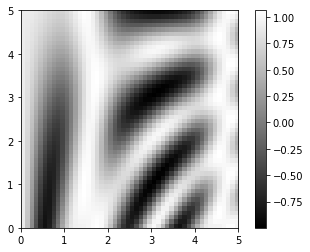

In [22]:
z =  np.cos(13 + yy * xx) * np.cos(xx) + np.sin(xx) ** 8 
plt.imshow(z,  extent=[0, 5, 0, 5], cmap='gray')
plt.colorbar();